# ИДЗ 3 (вариант 13)
## Ноздрин В.Я. гр. 9383

$\alpha_1=0.02\quad h=0.73$  

Таблица 1:

In [1]:
x = c(   3,    1,    1,    1,    2,    2,    2,    2,    1,    2,    2,    3,    3,    2,    0,    2,    3,
         3,    3,    1,    3,    2,    2,    4,    2,    1,    2,    1,    4,    2,    3,    2,    2,    3,
         2,    1,    2,    2,    1,    3,    3,    2,    0,    3,    3,    2,    1,    2,    2,    1)
y = c(5.89, 6.13, 7.55, 6.56, 7.32, 6.52, 6.20, 5.70, 6.56, 5.84, 6.88, 6.19, 6.35, 6.55, 6.54, 5.25, 6.82,
      5.78, 6.73, 7.41, 6.28, 6.36, 6.22, 5.86, 6.82, 6.21, 5.51, 6.91, 6.46, 6.45, 6.47, 6.57, 4.99, 6.11,
      6.67, 6.47, 6.05, 6.23, 7.29, 6.64, 6.80, 6.27, 6.99, 7.06, 6.64, 6.67, 7.01, 6.89, 7.32, 6.63)
alpha1 = 0.02
h = 0.73

### 1) Построить графически результаты эксперимента. Сформулировать линейную регрессионную модель переменной  $Y$  по переменной  $X$ . Построить МНК оценки парамеров сдвига $\beta_0$  и масштаба  $\beta_1$ . Построить полученную линию регрессии. Оценить визуально соответствие полученных данных и построенной оценки.

Линейная регресия $Y=\beta_0+\beta_1X$

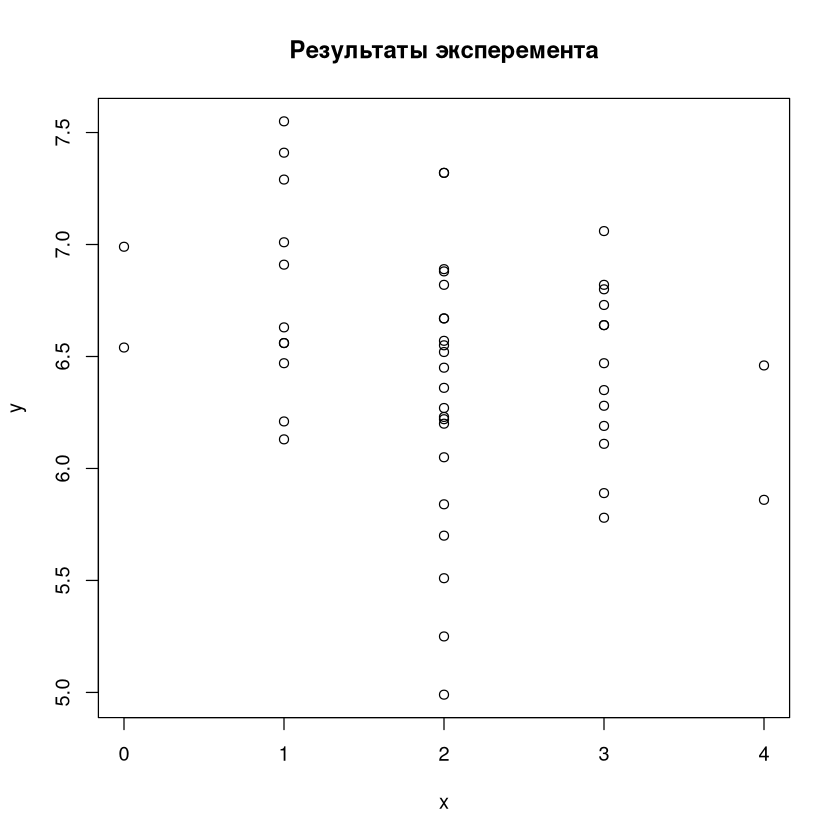

In [2]:
plot(x, y, main = "Результаты эксперемента")

МНК оценки парамеров сдвига  β0  и масштаба  β1

y = 6.796122-0.1586874x

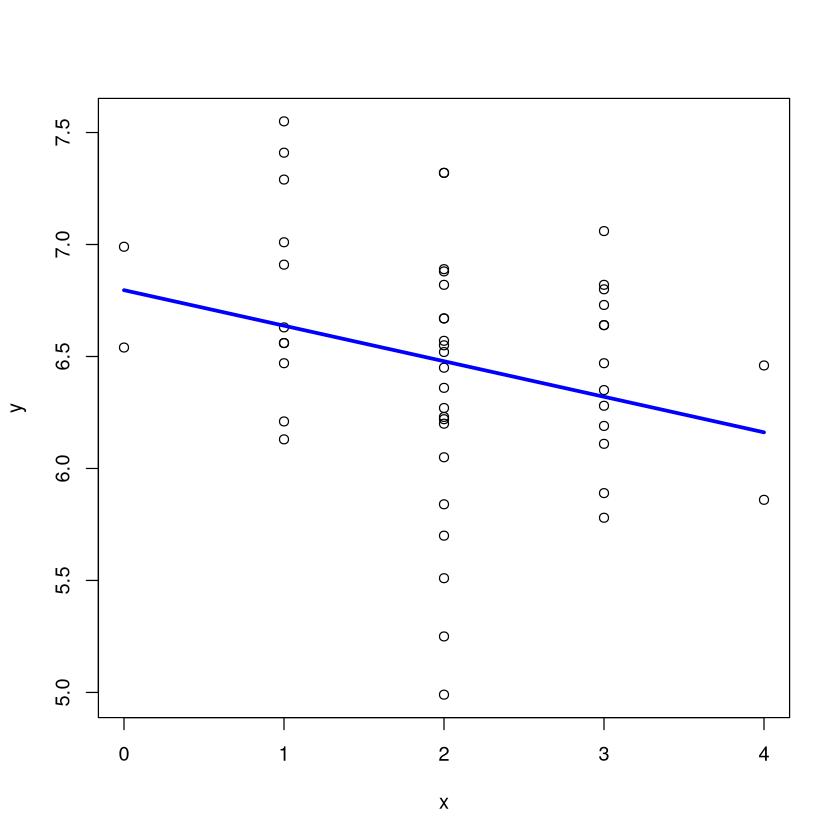

In [3]:
X = matrix(
    c(array(1,dim=50),x),
    nrow=2,ncol=50,byrow=TRUE
)
beta = solve(X%*%t(X))%*%X%*%y
cat("y = ",beta[1],"",beta[2],"x", sep="")
x1 = c(min(x), max(x))
y1 = beta[1]+beta[2]*x1
plot(x, y)
points(x1, y1, col="blue", type="l", lwd=3)

### 2) Построить и интерпретировать несмещенную оценку дисперсии. На базе ошибок построить гистограмму с шагом  $h$ . Проверить гипотезу нормальности ошибок на уровне $\alpha$  по $\chi^2$. Оценить расстояние полученной оценки до класса нормальных распределений по Колмогорову. Визуально оценить данный факт.

Несмещенная оценка дисперсии  
$\varepsilon_i=y_i-(\beta_0+\beta_1x_i)$
$$\hat\sigma^2=\frac{1}{n-2}\sum_{i=1}^n(\varepsilon_i-\hat\varepsilon)^2$$

0.2627237

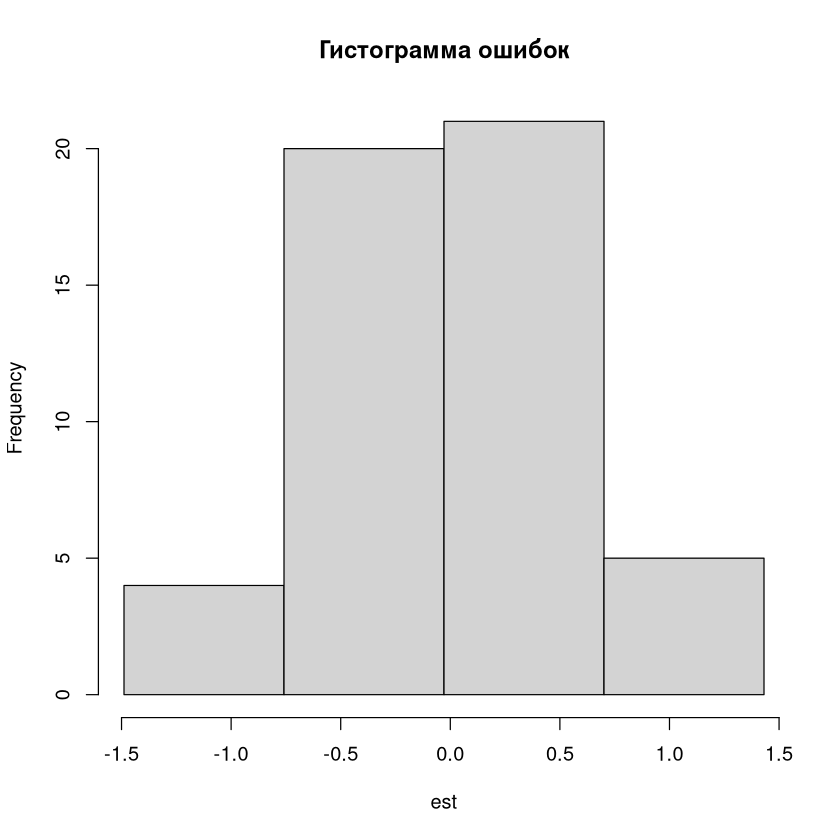

In [4]:
est=y-beta[1]-beta[2]*x
S2=sum((est-mean(est))^2)/(50-1)
cat(S2)

histogram = hist(
    est,
    breaks=seq(min(est), max(est)+h, by=h),
    main = "Гистограмма ошибок"
)

Проверка гипотезы нормальности ошибок на уровне $\alpha$ по $\chi^2$

In [5]:
breaks=seq(min(est), max(est)+h, by=h)
r = length(histogram$breaks)
nu = c(histogram$counts, 0)
p = rep(0, length(breaks))

for (i in 1:(r-1)) {
    p[i] = pnorm(breaks[i+1], sd=sqrt(S2)) - pnorm(breaks[i], sd=sqrt(S2))
}

p[r] = 1 - sum(p)
v1 = p * length(x)
v2 = (nu - v1)^2/v1
X2 = sum(v2)
xa = qchisq(1-alpha1, r-1)
cat("Гипотеза",ifelse(X2>xa, "принята,","отвергнута,"), X2, ifelse(X2>xa, "<",">"), xa)

Гипотеза отвергнута, 0.5513285 > 11.66784

Гипотезу принимаем, т.к  $\chi^2 < xa$


Оценим расстояние полученной оценки до класса нормальных распределений по Колмогорову

0.008610477

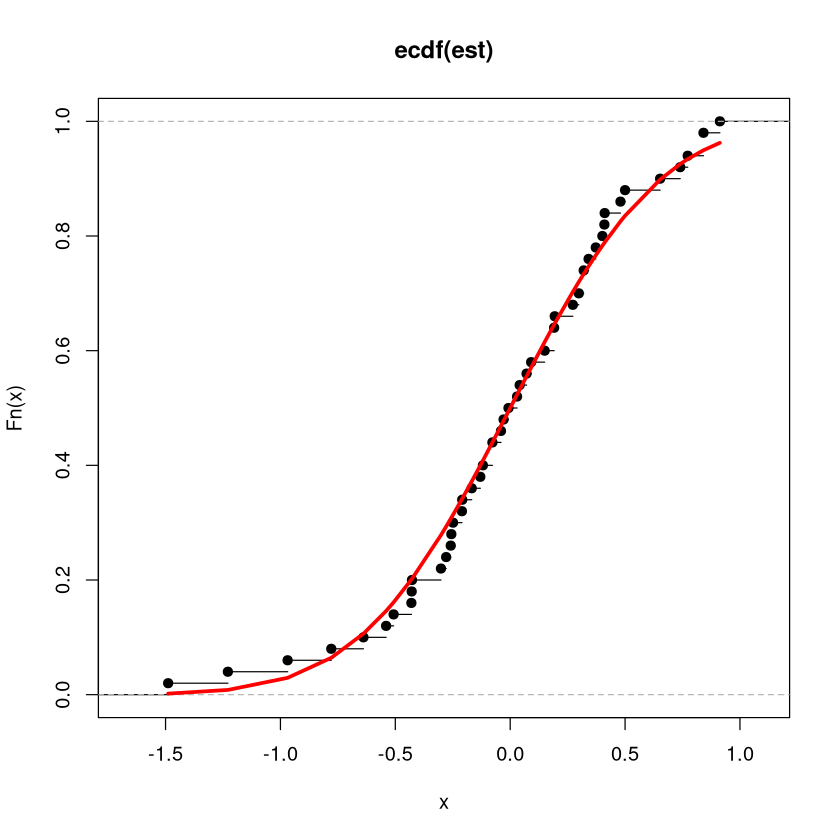

In [6]:
ks_test = ks.test(unique(est), 'pnorm', mean=mean(est), sd=sd(est))
distance = ks_test$statistic/sqrt(length(x))
cat(distance)
plot(ecdf(est))
points(sort(est), pnorm(sort(est),0,sqrt(S2)),type="l", col="red", lwd=3)

### 3) В предположении нормальности ошибок построить доверительные интервалы для параметров  $\beta_0$ и $\beta_1$  уровня доверия  $1−\alpha$ . Построить доверительный эллипс уровня доверия  $1−\alpha$  для  $(\beta_0,\beta_1)$  (вычислить полуоси).

In [7]:
d = qt(1-alpha1, length(y)-2)*sqrt(S2)*sqrt(diag(solve(X%*%t(X))))
CI = matrix(nrow=2,ncol=2)
CI[,1] = beta + d
CI[,2] = beta - d
cat(CI)

7.177538 0.0125733 6.414707 -0.3299481

### 4) Сформулировать гипотезу независимости переменной $Y$ от переменной $X$ . Провести проверку значимости.

In [8]:
fit = lm(y ~ x)
summary(fit)
t = qt(1-alpha1, length(y)-2)
T = (beta[2])/(sum((y - (beta[1] + beta[2]*x))**2)/((length(x)-2)*(sum((x-mean(x))**2))))
cat(T >= t)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.48875 -0.25809  0.01125  0.33592  0.91257 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.79612    0.18255  37.230   <2e-16 ***
x           -0.15869    0.08197  -1.936   0.0588 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5179 on 48 degrees of freedom
Multiple R-squared:  0.07243,	Adjusted R-squared:  0.05311 
F-statistic: 3.748 on 1 and 48 DF,  p-value: 0.05877


FALSE

### 5) Сформулировать модель, включающую дополнительный член с $\chi^2$. Построить МНК оценки параметров  $\beta_0,\beta_1,\beta_2$. Изобразить графически полученную регрессионную зависимость.


Call:
lm(formula = y ~ x + x2, data = data2)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.44509 -0.23143  0.01647  0.34819  0.90108 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.97196    0.28925  24.104   <2e-16 ***
x           -0.37764    0.29053  -1.300    0.200    
x2           0.05460    0.06948   0.786    0.436    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.52 on 47 degrees of freedom
Multiple R-squared:  0.08446,	Adjusted R-squared:  0.0455 
F-statistic: 2.168 on 2 and 47 DF,  p-value: 0.1257


6.971964 -0.3776412 0.05460167

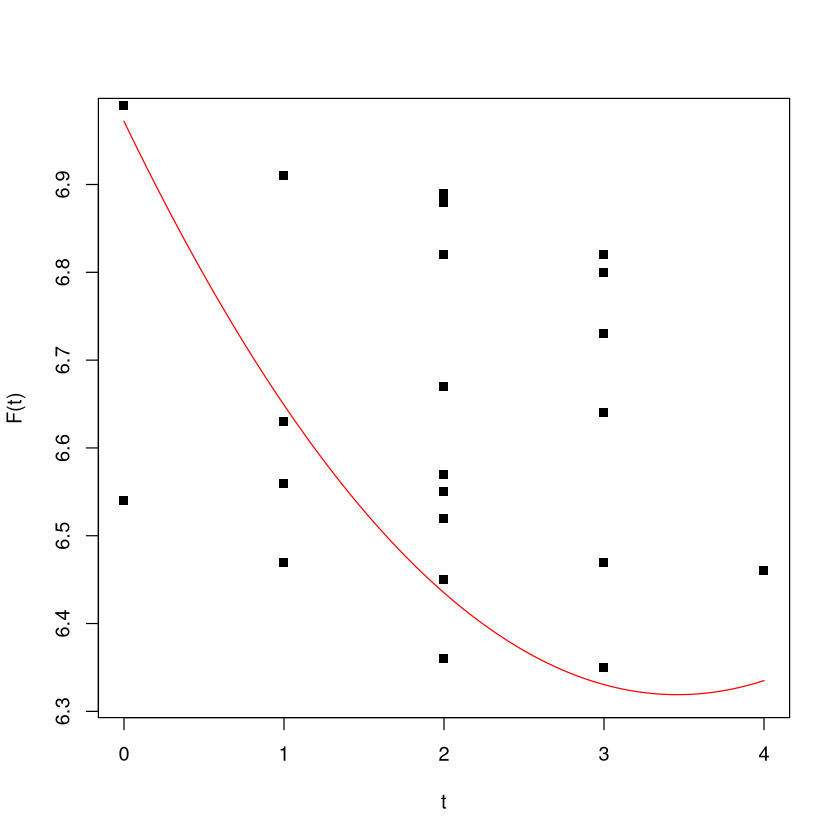

In [9]:
data2 = data.frame(y, x, x**2)
names(data2) = c("y", "x", "x2")
fit2 = lm(y~x+x2, data2)
summary(fit2)
betas = fit2$coefficients
cat(betas)
t = seq(min(x), max(x), by=0.001)
F = function(t){return (fit2$coefficients[1] + fit2$coefficients[2] * t + fit2$coefficients[3] * t ** 2)}
plot(t,F(t),, col="red", type ='l')
points(x,y,pch=15)

### 6) Построить несмещенную оценку дисперсии. Провести исследование нормальности ошибок как в п.3.

0.2703514

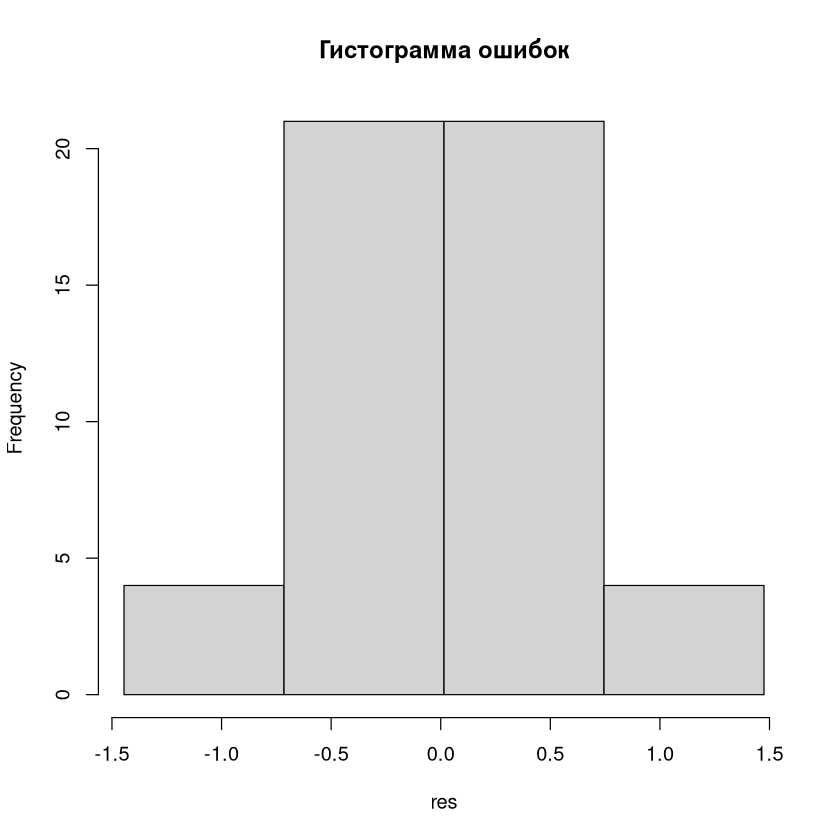

In [10]:
res = y - (fit2$coefficients[1] + fit2$coefficients[2]*x + fit2$coefficients[3]*x**2)
res_m = mean(res)
S2 = sum((res-res_m)^2)/(50-3)
cat(S2)
histogram = hist(res, breaks=seq(min(res), max(res) + h, by=h), main="Гистограмма ошибок")

Гипотеза отвергнута, 0.291373 > 11.667840.009325857

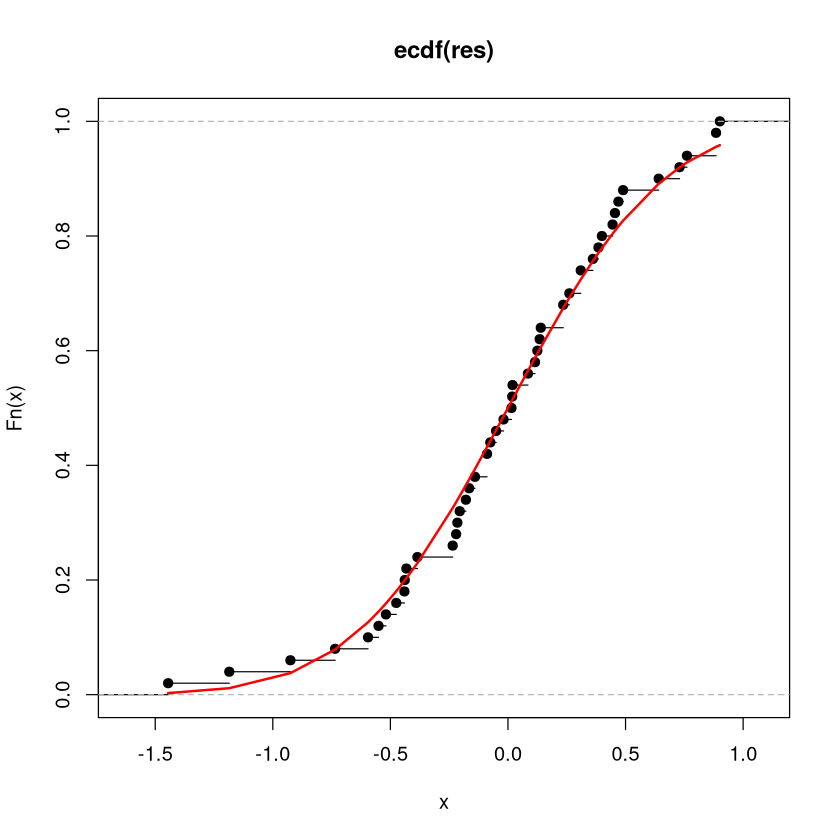

In [11]:
r = length(histogram$breaks)
nu = c(histogram$counts, 0)
breaks = seq(min(res), max(res) + h, by=h)
p = rep(0, length(breaks))
for (i in 1:(r-1)) {
    p[i] = pnorm(breaks[i+1], sd=sqrt(S2)) - pnorm(breaks[i], sd=sqrt(S2))
}

p[r] = 1 - sum(p)
v1 = p * length(x)
v2 = (nu - v1)^2/v1
X2 = sum(v2)
xa = qchisq(1-alpha1, r-1)
cat("Гипотеза",ifelse(X2>xa, "принята,","отвергнута,"), X2, ifelse(X2>xa, "<",">"), xa)

ks_test = ks.test(unique(res), 'pnorm', mean=mean(res), sd=sd(res))
distance = ks_test$statistic/sqrt(length(x))
cat(distance)
plot(ecdf(res))
points(sort(res), pnorm(sort(res),0,sqrt(S2)),type="l", col="red", lwd=2)